1. **[Import Packages](#import_packages)**
2. **[Read Data](#Read_Data)**
3. **[Understand and Prepare the Data](#data_preparation)**
    - 3.1 - [Data Types and Dimensions](#Data_Types)
    - 3.2 - [Data Manipulation](#Data_Manipulation)
    - 3.3 - [Missing Data Treatment](#Missing_Data_Treatment)
    - 3.4 - [Statistical Summary](#Statistical_Summary)
4. **[EDA](#EDA)**    
    - 4.1 - [Univariate Analysis](#Univariate_Analysis)
    - 4.2 - [Bivariate Analysis](#Bivariate_Analysis)
    - 4.3 - [Multivariate Analysis](#Multivariate_Analysis)
    - 4.4 - [Conclusion of EDA](#Conclusion_of_EDA)
5. **[Label Encoding for categorical Variable](#Label_Encoding_for_categorical_Variable)**
6. **[Feature Selection](#feature_selection)**
7. **[Feature Engineering](#feature_selection)**
7. **[Standardise Data](#Standardise_Data)**
9. **[ML Models](#ML_Models)**
    - 9.1 - [Naive Bayes](#Naive_Bayes) 
    

Smart Lead Scoring Engine

Can you identify the potential leads for a D2C startup?

Problem Statement

A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers).

Leads are captured in 2 ways - Directly and Indirectly.

Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.

Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.

Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.

Variable

Description

1. id : Unique identifier of a lead

2. created_at : Date of lead dropped

3. signup_date: Sign up date of the user on the website

4. campaign_var (1 and 2) : campaign information of the lead

5. products_purchased : No. of past products purchased at the time of dropping the lead

6. useractivityvar (1 to 12): Derived activities of the user on the website

7. buy: 0 or 1 indicating if the user will buy the product in next 3 months or not

In [70]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [71]:
os.getcwd()

'C:\\Users\\Dhananjay\\Documents\\PGDA Data Science\\imarticus PGDA\\Projects\\Addittional Project\\Completed Addittional Projects\\Smart Lead Engine'

In [72]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_sample=pd.read_csv('sample_submission.csv')
df_train

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0


In [73]:
df_test

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,0
13180,52342,2022-03-30,12,8,NaN,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0
13182,52344,2022-03-30,14,10,NaN,NaN,0,0,0,0,0,0,1,0,0,0,1,0


In [74]:
df=pd.concat([df_train,df_test])
df

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0.0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0.0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,0,NaN
13180,52342,2022-03-30,12,8,NaN,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0,NaN
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0,NaN
13182,52344,2022-03-30,14,10,NaN,NaN,0,0,0,0,0,0,1,0,0,0,1,0,NaN


In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52345 entries, 0 to 13183
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    52345 non-null  int64  
 1   created_at            52345 non-null  object 
 2   campaign_var_1        52345 non-null  int64  
 3   campaign_var_2        52345 non-null  int64  
 4   products_purchased    23298 non-null  float64
 5   signup_date           30583 non-null  object 
 6   user_activity_var_1   52345 non-null  int64  
 7   user_activity_var_2   52345 non-null  int64  
 8   user_activity_var_3   52345 non-null  int64  
 9   user_activity_var_4   52345 non-null  int64  
 10  user_activity_var_5   52345 non-null  int64  
 11  user_activity_var_6   52345 non-null  int64  
 12  user_activity_var_7   52345 non-null  int64  
 13  user_activity_var_8   52345 non-null  int64  
 14  user_activity_var_9   52345 non-null  int64  
 15  user_activity_var_1

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,52345.0,26173.000000,15110.844257,1.0,13087.0,26173.0,39259.0,52345.0
campaign_var_1,52345.0,6.826211,3.543873,1.0,4.0,6.0,9.0,16.0
campaign_var_2,52345.0,6.828198,2.711333,1.0,5.0,7.0,9.0,15.0
products_purchased,23298.0,2.144347,0.780816,1.0,2.0,2.0,3.0,4.0
user_activity_var_1,52345.0,0.396714,0.508333,0.0,0.0,0.0,1.0,3.0
user_activity_var_2,52345.0,0.006094,0.077828,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,52345.0,0.102952,0.303899,0.0,0.0,0.0,0.0,1.0
user_activity_var_4,52345.0,0.010373,0.101322,0.0,0.0,0.0,0.0,1.0
user_activity_var_5,52345.0,0.151896,0.359933,0.0,0.0,0.0,0.0,2.0
user_activity_var_6,52345.0,0.506295,0.560053,0.0,0.0,0.0,1.0,3.0


In [78]:
df.describe(include='all')

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,52345.000000,52345,52345.000000,52345.000000,23298.000000,30583,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,39161.000000
unique,NaN,454,NaN,NaN,NaN,1819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12-26,NaN,NaN,NaN,2022-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,181,NaN,NaN,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,26173.000000,NaN,6.826211,6.828198,2.144347,NaN,0.396714,0.006094,0.102952,0.010373,0.151896,0.506295,0.291107,0.166434,0.010679,0.000344,0.227624,0.000478,0.051020
std,15110.844257,NaN,3.543873,2.711333,0.780816,NaN,0.508333,0.077828,0.303899,0.101322,0.359933,0.560053,0.457671,0.372679,0.102973,0.018541,0.439849,0.021849,0.220042
min,1.000000,NaN,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13087.000000,NaN,4.000000,5.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26173.000000,NaN,6.000000,7.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39259.000000,NaN,9.000000,9.000000,3.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52345 entries, 0 to 13183
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    52345 non-null  int64  
 1   created_at            52345 non-null  object 
 2   campaign_var_1        52345 non-null  int64  
 3   campaign_var_2        52345 non-null  int64  
 4   products_purchased    23298 non-null  float64
 5   signup_date           30583 non-null  object 
 6   user_activity_var_1   52345 non-null  int64  
 7   user_activity_var_2   52345 non-null  int64  
 8   user_activity_var_3   52345 non-null  int64  
 9   user_activity_var_4   52345 non-null  int64  
 10  user_activity_var_5   52345 non-null  int64  
 11  user_activity_var_6   52345 non-null  int64  
 12  user_activity_var_7   52345 non-null  int64  
 13  user_activity_var_8   52345 non-null  int64  
 14  user_activity_var_9   52345 non-null  int64  
 15  user_activity_var_1

### Checking The Distibution Of Numeric VARIABLES

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'campaign_var_1'}>,
        <AxesSubplot:title={'center':'campaign_var_2'}>,
        <AxesSubplot:title={'center':'products_purchased'}>],
       [<AxesSubplot:title={'center':'user_activity_var_1'}>,
        <AxesSubplot:title={'center':'user_activity_var_2'}>,
        <AxesSubplot:title={'center':'user_activity_var_3'}>,
        <AxesSubplot:title={'center':'user_activity_var_4'}>],
       [<AxesSubplot:title={'center':'user_activity_var_5'}>,
        <AxesSubplot:title={'center':'user_activity_var_6'}>,
        <AxesSubplot:title={'center':'user_activity_var_7'}>,
        <AxesSubplot:title={'center':'user_activity_var_8'}>],
       [<AxesSubplot:title={'center':'user_activity_var_9'}>,
        <AxesSubplot:title={'center':'user_activity_var_10'}>,
        <AxesSubplot:title={'center':'user_activity_var_11'}>,
        <AxesSubplot:title={'center':'user_activity_var_12'}>],
       [<AxesSubplot:title={'

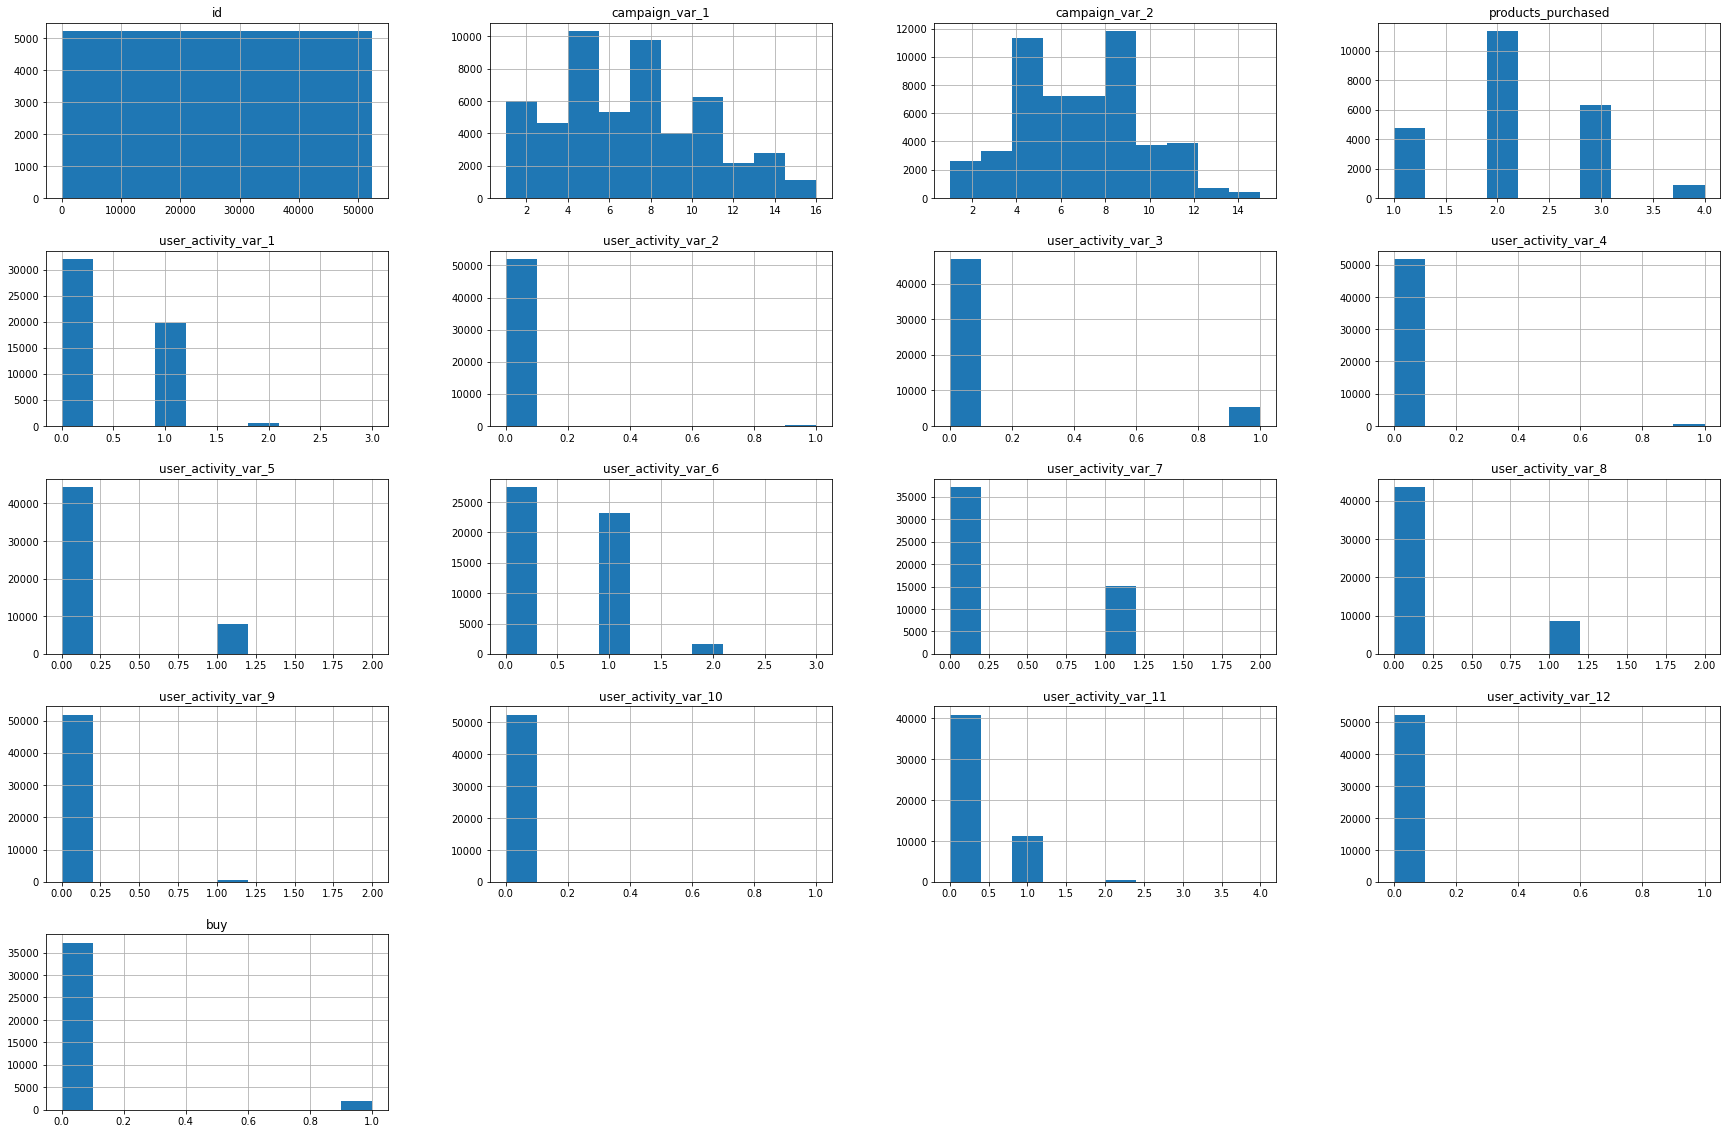

In [80]:
df.hist(figsize=(30,20))

### Checking The Correlation Between Variables

<AxesSubplot:>

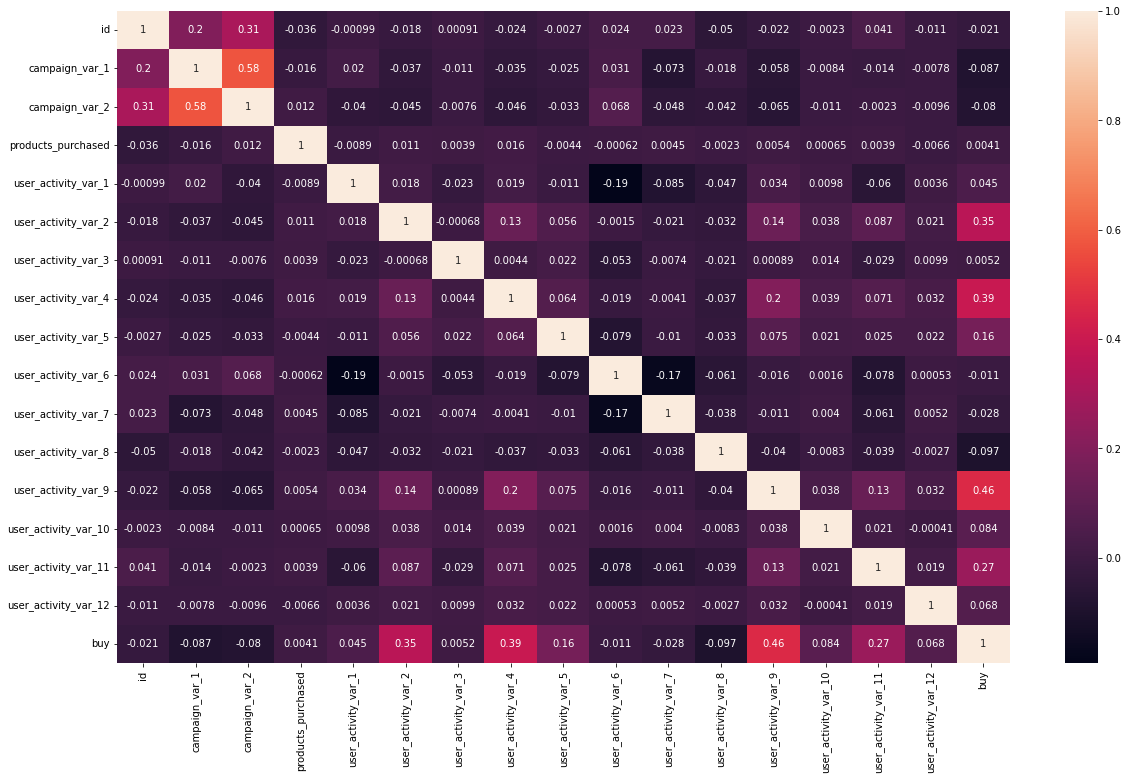

In [81]:
plt.figure(figsize=(20,12))
sns.heatmap(df.drop(['created_at','signup_date'],axis=1).corr(),annot=True)

In [82]:
df.campaign_var_2.value_counts()

7     7247
6     7221
8     6613
5     6360
9     5219
4     4996
10    3779
3     3293
11    2423
2     1973
12    1459
13     730
1      622
14     330
15      80
Name: campaign_var_2, dtype: int64

### Checking The Outliers


<AxesSubplot:>

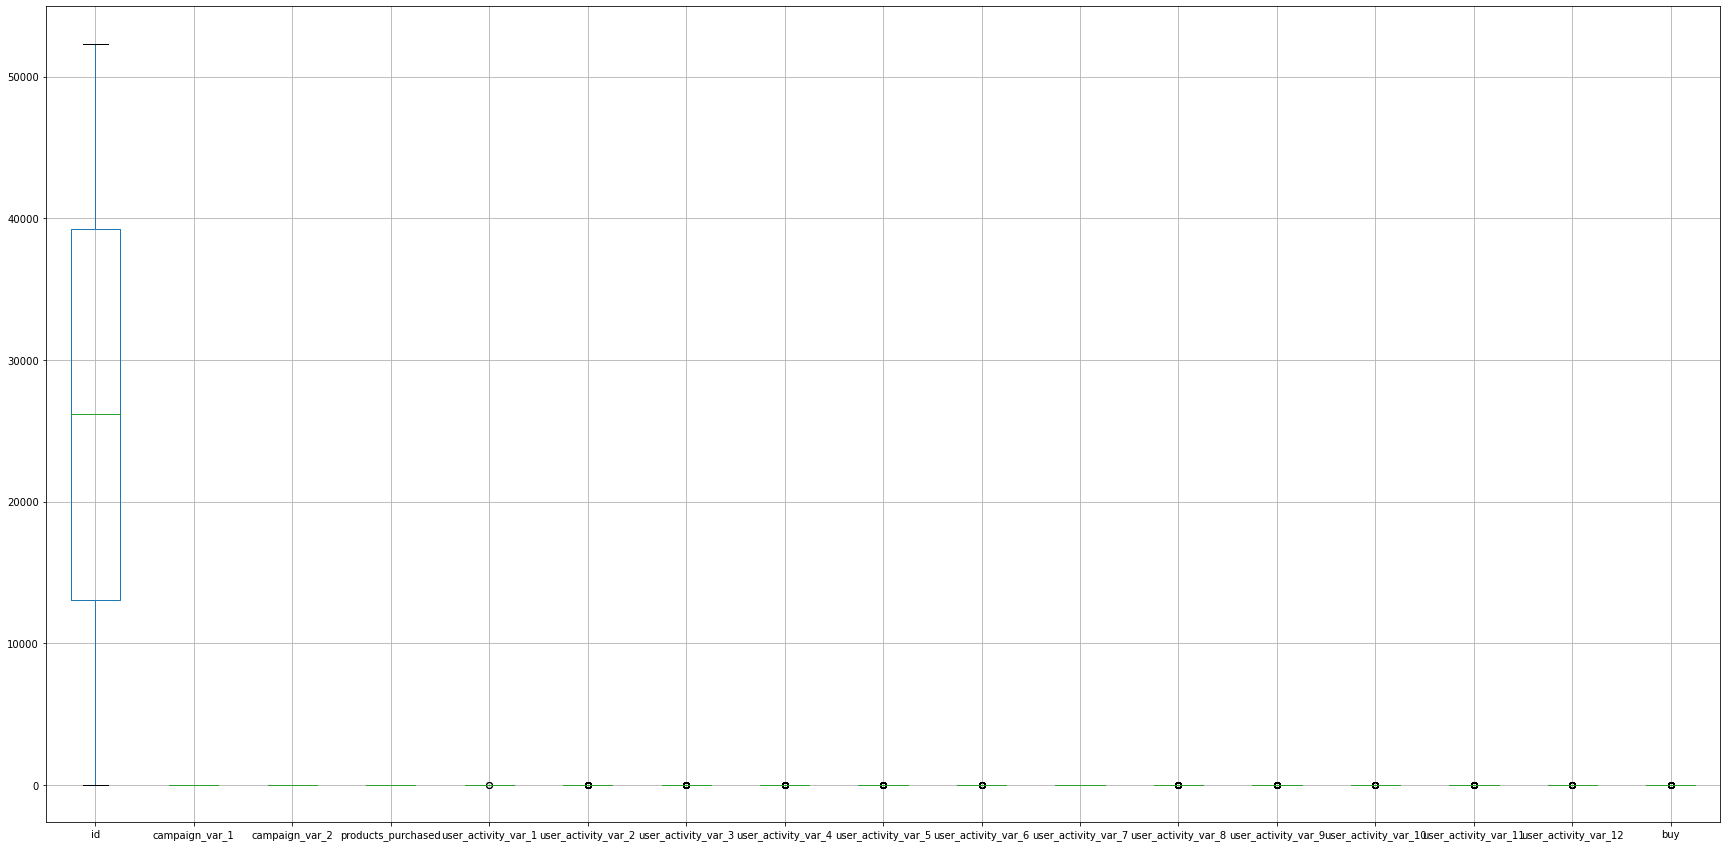

In [83]:
plt.figure(figsize=(30,15))
(df.drop(['created_at','signup_date'],axis=1)).boxplot()

# 2. EDA

### 2.1 Treating Nulls 

In [84]:
nulls=df.isnull().sum()
nulls=pd.DataFrame({'count':nulls,'percent':(nulls/df.shape[0])*100})
nulls.sort_values('percent',ascending=False)

,count,percent
products_purchased,29047,55.491451
signup_date,21762,41.574171
buy,13184,25.186742
user_activity_var_6,0,0.000000
user_activity_var_12,0,0.000000
user_activity_var_11,0,0.000000
user_activity_var_10,0,0.000000
user_activity_var_9,0,0.000000
user_activity_var_8,0,0.000000
user_activity_var_7,0,0.000000


#### Treating the nulls of Product_purchased column

In [85]:
df.shape

(52345, 19)

In [86]:
df.created_at.value_counts()


2021-12-26    181
2021-12-09    180
2021-12-07    179
2021-12-21    179
2021-12-04    178
             ... 
2021-01-07     34
2021-01-14     33
2021-01-06     29
2021-01-22     26
2021-01-01     21
Name: created_at, Length: 454, dtype: int64

In [ ]:
from scipy.stats import mode

In [90]:
# grouping the products bt Lead Dropping Date

med_products=df.pivot_table(values='products_purchased',index='created_at',aggfunc=np.median)
med_products

,products_purchased
created_at,
2021-01-01,2.0
2021-01-02,2.0
2021-01-03,2.0
2021-01-04,2.0
2021-01-05,3.0
...,...
2022-03-26,2.0
2022-03-27,2.0
2022-03-28,2.0


In [91]:
prod_bool=df.products_purchased.isnull()
df.loc[prod_bool,'products_purchased']=df.loc[prod_bool,'created_at'].apply(lambda x:med_products.loc[x])

In [92]:
nulls=df.isnull().sum()
nulls=pd.DataFrame({'count':nulls,'percent':(nulls/df.shape[0])*100})
nulls.sort_values('percent',ascending=False)

,count,percent
signup_date,21762,41.574171
buy,13184,25.186742
user_activity_var_5,0,0.000000
user_activity_var_12,0,0.000000
user_activity_var_11,0,0.000000
user_activity_var_10,0,0.000000
user_activity_var_9,0,0.000000
user_activity_var_8,0,0.000000
user_activity_var_7,0,0.000000
user_activity_var_6,0,0.000000


#### Treating the nulls of Signup_date column

In [93]:
# grouping 'signup_date' values using 'created_at' column
mode_sign=df.pivot_table(values='signup_date',index='created_at',aggfunc=lambda x:mode(x).mode[0])
mode_sign


,signup_date
created_at,
2021-01-01,2021-10-20
2021-01-02,2017-06-19
2021-01-03,2019-10-18
2021-01-04,2021-04-06
2021-01-05,2020-01-29
...,...
2022-03-26,2022-01-01
2022-03-27,2022-01-01
2022-03-28,2021-06-05


In [94]:
s_bool=df['signup_date'].isnull()
df.loc[s_bool,'signup_date']=df.loc[s_bool,'created_at'].apply(lambda x:mode_sign.loc[x])

In [95]:
nulls=df.isnull().sum()
nulls=pd.DataFrame({'count':nulls,'percent':(nulls/df.shape[0])*100})
nulls.sort_values('percent',ascending=False)

,count,percent
buy,13184,25.186742
user_activity_var_5,0,0.000000
user_activity_var_12,0,0.000000
user_activity_var_11,0,0.000000
user_activity_var_10,0,0.000000
user_activity_var_9,0,0.000000
user_activity_var_8,0,0.000000
user_activity_var_7,0,0.000000
user_activity_var_6,0,0.000000
id,0,0.000000


## Feature Engineering

##### User_activity columns

In [96]:
df.shape

(52345, 19)

In [97]:
df

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0.0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0.0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,5,2021-01-01,4,6,2.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,2.0,2021-08-02,0,0,0,0,0,1,1,0,0,0,0,0,NaN
13180,52342,2022-03-30,12,8,2.0,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0,NaN
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0,NaN
13182,52344,2022-03-30,14,10,2.0,2021-08-02,0,0,0,0,0,0,1,0,0,0,1,0,NaN


In [98]:
df.shape

(52345, 19)

In [99]:
df.iloc[:,6:18]

,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,0,0,0,0,0,0,1,1,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13179,0,0,0,0,0,1,1,0,0,0,0,0
13180,1,0,0,0,0,1,0,0,0,0,0,0
13181,0,0,1,0,0,0,1,0,0,0,0,0
13182,0,0,0,0,0,0,1,0,0,0,1,0


In [100]:
df['user_activity']=df.iloc[:,6:18].sum(axis=1)

In [101]:
df

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,user_activity
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0.0,2
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0.0,3
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0.0,1
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
4,5,2021-01-01,4,6,2.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,2.0,2021-08-02,0,0,0,0,0,1,1,0,0,0,0,0,NaN,2
13180,52342,2022-03-30,12,8,2.0,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0,NaN,2
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0,NaN,2
13182,52344,2022-03-30,14,10,2.0,2021-08-02,0,0,0,0,0,0,1,0,0,0,1,0,NaN,2


In [102]:
df.user_activity.value_counts()

2    21397
1    16026
3     9661
0     2864
4     1970
5      336
6       68
7       18
8        5
Name: user_activity, dtype: int64

<AxesSubplot:xlabel='user_activity', ylabel='count'>

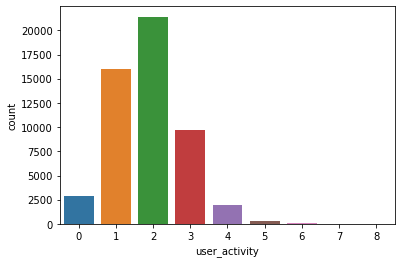

In [103]:
sns.countplot(df.user_activity)

In [105]:
df['user_activity_labeled']=df['user_activity'].apply(lambda x: 'No Activity' if x==0   else'Moderate' if x <5 else 'High'  ) 

In [107]:
df

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,user_activity,user_activity_labeled
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,...,0,1,1,0,0,0,0,0.0,2,Moderate
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,...,0,1,0,0,0,0,0,0.0,3,Moderate
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,...,0,0,0,0,0,0,0,0.0,1,Moderate
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,No Activity
4,5,2021-01-01,4,6,2.0,2020-06-08,0,0,0,0,...,0,1,0,0,0,1,0,0.0,2,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,2.0,2021-08-02,0,0,0,0,...,1,1,0,0,0,0,0,NaN,2,Moderate
13180,52342,2022-03-30,12,8,2.0,2022-03-19,1,0,0,0,...,1,0,0,0,0,0,0,NaN,2,Moderate
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,...,0,1,0,0,0,0,0,NaN,2,Moderate
13182,52344,2022-03-30,14,10,2.0,2021-08-02,0,0,0,0,...,0,1,0,0,0,1,0,NaN,2,Moderate


In [108]:
df.user_activity_labeled.value_counts()

Moderate       49054
No Activity     2864
High             427
Name: user_activity_labeled, dtype: int64

In [109]:
df['user_activity_labeled'].replace(['No Activity','Moderate','High'],[0,1,2],inplace=True)

In [110]:
df

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,user_activity,user_activity_labeled
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,...,0,1,1,0,0,0,0,0.0,2,1
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,...,0,1,0,0,0,0,0,0.0,3,1
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,...,0,0,0,0,0,0,0,0.0,1,1
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
4,5,2021-01-01,4,6,2.0,2020-06-08,0,0,0,0,...,0,1,0,0,0,1,0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,2.0,2021-08-02,0,0,0,0,...,1,1,0,0,0,0,0,NaN,2,1
13180,52342,2022-03-30,12,8,2.0,2022-03-19,1,0,0,0,...,1,0,0,0,0,0,0,NaN,2,1
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,...,0,1,0,0,0,0,0,NaN,2,1
13182,52344,2022-03-30,14,10,2.0,2021-08-02,0,0,0,0,...,0,1,0,0,0,1,0,NaN,2,1


In [111]:
df.user_activity_labeled.value_counts()

1    49054
0     2864
2      427
Name: user_activity_labeled, dtype: int64

In [112]:
from datetime import datetime

In [1]:
df['created_at']=pd.to_datetime(df['created_at'])
df['signup_date']=pd.to_datetime(df['signup_date'])

NameError: name 'pd' is not defined

In [114]:
df['Active_days_no']=((df['created_at']) - df['signup_date']).dt.days

In [115]:
df['Active_days_no']

0          99
1         104
2        -222
3        1185
4         207
         ... 
13179     240
13180      11
13181     227
13182     240
13183     240
Name: Active_days_no, Length: 52345, dtype: int64

In [116]:
df['Active_days_no']=abs(df['Active_days_no'])

In [117]:
df['Active_days_no']

0          99
1         104
2         222
3        1185
4         207
         ... 
13179     240
13180      11
13181     227
13182     240
13183     240
Name: Active_days_no, Length: 52345, dtype: int64

In [118]:
df['Active_days_no'].dtype

dtype('int64')

In [119]:
#(df['created_at']-df['signup_date'])

In [120]:
#df['Active_days_no']=df['created_at']-df['signup_date']

In [121]:
#df['Active_days_no']=str(df['Active_days_no'])

In [122]:
#df['Active_days_no']

In [123]:
#df['created_at']-df['signup_date']

** so we have finally Treated the required Nulls and
only nulls of 'Buy' column are there which exists for test datast only**

### 2.2 Checking and visualizing the outliers

<AxesSubplot:>

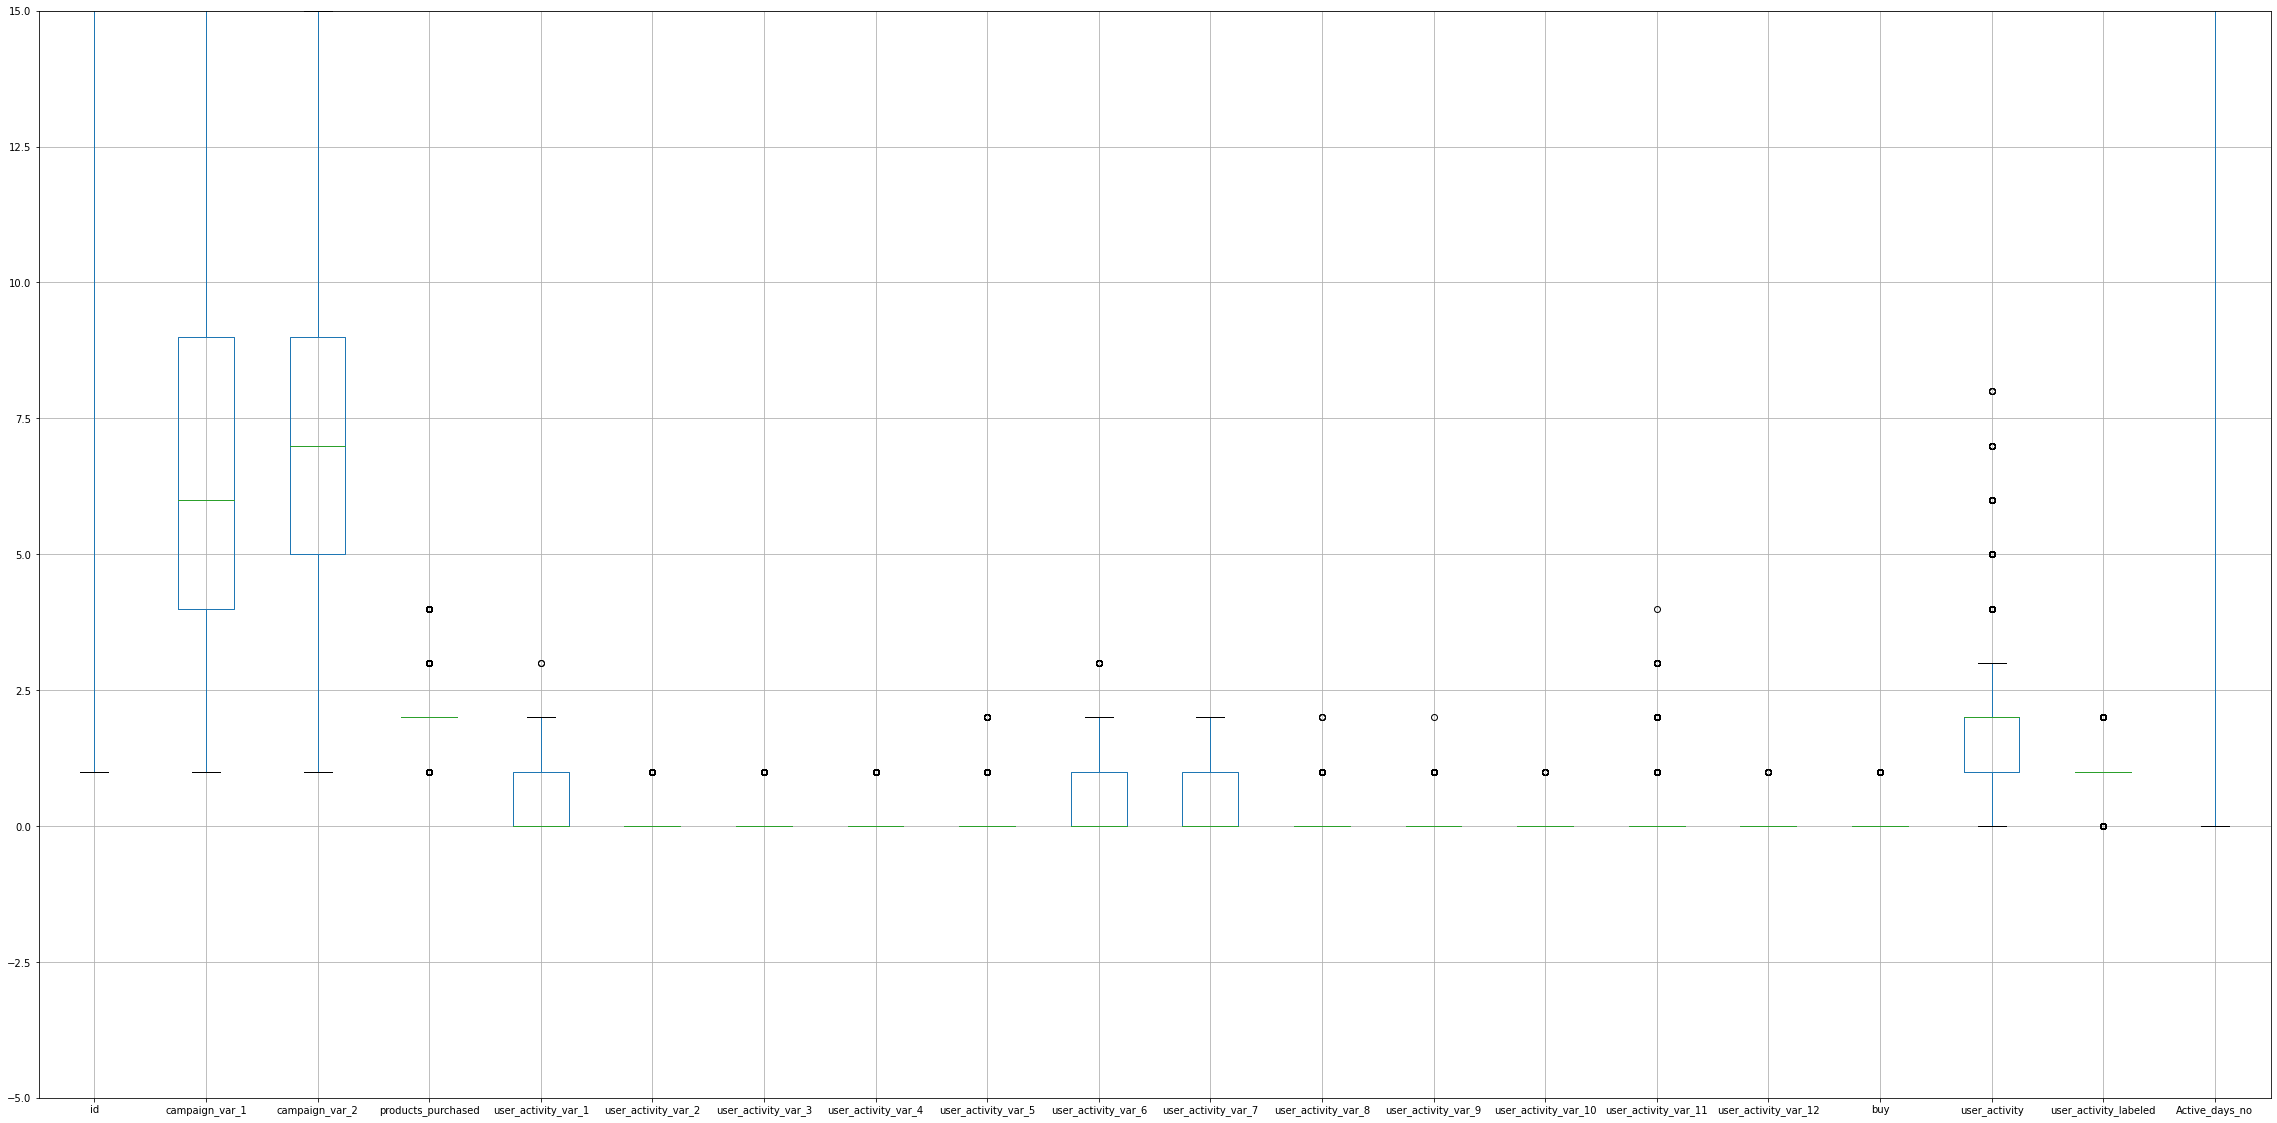

In [124]:
plt.figure(figsize=(40,20))
plt.ylim(-5,15)
df.boxplot()

### Distribution of Numeric Variables 

## 3.Final treated Dataset

In [125]:
#treated nulls and feature engineered train test data

df_train_final=df[~df['buy'].isnull()]
train=df_train_final.drop(['created_at','signup_date'],axis=1)

df_test_final=df[df['buy'].isnull()]
test=df_test_final.drop(['buy','created_at','signup_date'],axis=1)


In [126]:
train.shape,df.shape

((39161, 20), (52345, 22))

In [127]:
train.shape,test.shape

((39161, 20), (13184, 19))

In [128]:
# Dropping the unrequired columns i 

#Train Datasets
x_tr=train.drop(['buy'],axis=1)
y_tr=train['buy']


### Handling Unbalanced Data using SMOTE

<AxesSubplot:xlabel='buy', ylabel='count'>

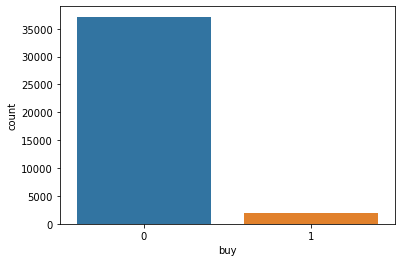

In [129]:
# Checking the balance of target variable
df_train.buy.value_counts()
sns.countplot(df_train['buy'])

** so we see that it is unbalanced data so we try to balance using SMOTE**

In [130]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split as split

smote=SMOTE()
x_resamp,y_resamp=smote.fit_resample(x_tr,y_tr.ravel())


In [131]:
y_resamp

array([0., 0., 0., ..., 1., 1., 1.])

####  Standardizing the Data for ML MOdel

In [132]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_resamp_sc=sc.fit_transform(x_resamp)


In [133]:
#without standardizing
x_train,x_test,y_train,y_test=split(x_resamp_sc,y_resamp,random_state=100,test_size=0.25)

In [134]:
# pca 
'''
from sklearn.decomposition import PCA

pca=PCA(0.95,random_state=1)

principalComponents = pca.fit_transform(x_resamp_sc)

principalDf = pd.DataFrame(data = principalComponents,columns=['PCA'+' '+str(i) for i in range(principalComponents.shape[1])])



# Splitting the Train Dataests into internal Train,Test data
x_train,x_test,y_train,y_test=split(principalDf,y_resamp,random_state=100,test_size=0.25)
'''

"\nfrom sklearn.decomposition import PCA\n\npca=PCA(0.95,random_state=1)\n\nprincipalComponents = pca.fit_transform(x_resamp_sc)\n\nprincipalDf = pd.DataFrame(data = principalComponents,columns=['PCA'+' '+str(i) for i in range(principalComponents.shape[1])])\n\n\n\n# Splitting the Train Dataests into internal Train,Test data\nx_train,x_test,y_train,y_test=split(principalDf,y_resamp,random_state=100,test_size=0.25)\n"

 Splitting the Train Dataests into internal Train,Test data
x_train,x_test,y_train,y_test=split(x_resamp,y_resamp,random_state=100,test_size=0.25)


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

### Score Card

In [135]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

from sklearn.metrics import classification_report as report
from sklearn.metrics import confusion_matrix as matrix

In [136]:
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'f1-score'])



def updateScoreCard(model_name):
    global score_card
    
    score_card = score_card.append({'Model': model_name,
                                        'Precision Score': metrics.precision_score(y_test,test_pred),
                                        'Recall Score': metrics.recall_score(y_test,test_pred),
                                        'Accuracy Score': metrics.accuracy_score(y_test,test_pred),
                                        'f1-score': metrics.f1_score(y_test,test_pred)}, 
                                        ignore_index = True)
    return(score_card)

### 4.1  Feature Selection with Random Forest Model

#### Base Model

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
rfc =RandomForestClassifier(n_estimators=300,random_state=42, n_jobs=-1, oob_score=True)

In [139]:

# Fitting the Model
rfc.fit(x_train,y_train)
# Model Predict
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)

#score
getscore=updateScoreCard('Random Forest Base')
getscore


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.98552,0.97062,0.978097,0.978013


In [140]:
'''
ImpFeatures=pd.DataFrame(columns=['colname','count'])
ImpFeatures['colname']=x_tr.columns
ImpFeatures['count']=rfc.feature_importances_
ImpFeatures.sort_values(by='count',ascending=False)
'''

"\nImpFeatures=pd.DataFrame(columns=['colname','count'])\nImpFeatures['colname']=x_tr.columns\nImpFeatures['count']=rfc.feature_importances_\nImpFeatures.sort_values(by='count',ascending=False)\n"

### Important Features Selected

In [141]:
'''
Impf=ImpFeatures[ImpFeatures['count']>0.05]
Impf.colname
'''

"\nImpf=ImpFeatures[ImpFeatures['count']>0.05]\nImpf.colname\n"

In [142]:
'''
x_resamp[Impf.colname]
'''

'\nx_resamp[Impf.colname]\n'

In [143]:
'''
x_resamp_imp=x_resamp[Impf.colname]

#Standardizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_resamp_imp_sc=sc.fit_transform(x_resamp_imp)
'''

'\nx_resamp_imp=x_resamp[Impf.colname]\n\n#Standardizing the data\nfrom sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\n\nx_resamp_imp_sc=sc.fit_transform(x_resamp_imp)\n'

In [144]:
'''
# splitting the Scaled important columns of resamp data
x_train,x_test,y_train,y_test=split(x_resamp_imp_sc,y_resamp,random_state=100,test_size=0.25)
'''

'\n# splitting the Scaled important columns of resamp data\nx_train,x_test,y_train,y_test=split(x_resamp_imp_sc,y_resamp,random_state=100,test_size=0.25)\n'

# 4. Model Building

### 4.1 LogisticRegression

In [145]:
from sklearn.linear_model import  LogisticRegression

In [146]:
# Fitting the Model
LrModel=LogisticRegression()

LrModel.fit(x_train,y_train)

# Model Predict
train_pred=LrModel.predict(x_train)
test_pred=LrModel.predict(x_test)

#score
getscore=updateScoreCard('Logistic Regression')
getscore

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.98552,0.97062,0.978097,0.978013
1,Logistic Regression,0.977409,0.890736,0.934829,0.932062


## 4.2 Decision Tree Model

In [147]:
from sklearn.tree import DecisionTreeClassifier

DCT=DecisionTreeClassifier()

# Fitting the Model
DCT.fit(x_train,y_train)
# Model Predict
train_pred=DCT.predict(x_train)
test_pred=DCT.predict(x_test)

getscore=updateScoreCard('Decision Tree Base')
getscore


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.98552,0.97062,0.978097,0.978013
1,Logistic Regression,0.977409,0.890736,0.934829,0.932062
2,Decision Tree Base,0.955539,0.970191,0.962383,0.962809


Previous


Model	Precision Score	Recall Score	Accuracy Score	f1-score
0	Logistic Regression	0.792329	0.828437	0.804919	0.809981
1	Random Forest Base	0.918679	0.933948	0.925358	0.926251
2	Random Forest Base	0.918679	0.933948	0.925358	0.926251

## 4.3 Random Forest 

#### Base Model

In [148]:
# Fitting the Model
rfc.fit(x_train,y_train)
# Model Predict
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)

#score
getscore=updateScoreCard('Random Forest Base')
getscore

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.98552,0.97062,0.978097,0.978013
1,Logistic Regression,0.977409,0.890736,0.934829,0.932062
2,Decision Tree Base,0.955539,0.970191,0.962383,0.962809
3,Random Forest Base,0.98552,0.97062,0.978097,0.978013


#### hypertuning the parameters using GridSearch

In [149]:
from sklearn.model_selection import GridSearchCV

params={ 'max_depth':[5,10,15,20,30],'max_features': [6, 8, 10, 12,15],'n_estimators':[100,150,200]}
grid_model=GridSearchCV(estimator=rfc, param_grid=params, cv=4, n_jobs=-1,scoring ='accuracy')

In [150]:
# Fitting the Model
grid_model.fit(x_train,y_train)

#best Estimator
grid_best_RF=grid_model.best_estimator_
grid_best_RF

RandomForestClassifier(max_depth=30, max_features=10, n_estimators=150,
                       n_jobs=-1, oob_score=True, random_state=42)

In [151]:
# Model Predict
train_pred=grid_best_RF.predict(x_train)
test_pred=grid_best_RF.predict(x_test)

In [152]:
getscore=updateScoreCard('Random Forest Best Estimator ID')
getscore

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.98552,0.97062,0.978097,0.978013
1,Logistic Regression,0.977409,0.890736,0.934829,0.932062
2,Decision Tree Base,0.955539,0.970191,0.962383,0.962809
3,Random Forest Base,0.98552,0.97062,0.978097,0.978013
4,Random Forest Best Estimator ID,0.984137,0.971263,0.97772,0.977658


Previous1

Model	Precision Score	Recall Score	Accuracy Score	f1-score
0	Logistic Regression	0.792329	0.828437	0.804919	0.809981
1	Random Forest Base	0.918679	0.933948	0.925358	0.926251
2	Random Forest Base	0.918679	0.933948	0.925358	0.926251
3	Random Forest Best Estimator ID Random	0.925749	0.954536	0.938758	0.939922

Recent Previous 2

Model	                Precision Score	Recall Score	Accuracy Score	f1-score
0	Logistic Regression       	0.792101	0.830152	0.805403	0.810681
1	Decision Tree Base	          0.86114	0.894381	0.87461 	0.877446
2	Random Forest Base	         0.898564	0.919472	0.907491	0.908898
3	Random F Best Esor ID    	0.893209	0.923762	0.906307	0.908228

## 4.3 Boosting Models

#### XGB Base Model

In [153]:
from xgboost import XGBClassifier

In [154]:
xgb=XGBClassifier(objective='reg:logistic',use_label_encoder =False)

In [155]:
# Fitting the Model
xgb.fit(x_train,y_train)
# Model Predict
train_pred=xgb.predict(x_train)
test_pred=xgb.predict(x_test)

#Score Card
getscore=updateScoreCard('XGB Base')
getscore


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.98552,0.97062,0.978097,0.978013
1,Logistic Regression,0.977409,0.890736,0.934829,0.932062
2,Decision Tree Base,0.955539,0.970191,0.962383,0.962809
3,Random Forest Base,0.98552,0.97062,0.978097,0.978013
4,Random Forest Best Estimator ID,0.984137,0.971263,0.97772,0.977658
5,XGB Base,0.98595,0.955608,0.970886,0.970542


ptrevious ID

Model	                                     Precision Score	Recall Score	Accuracy Score	f1-score
0	Logistic Regression                     	0.792329	0.828437	0.804919	0.809981
1	Random Forest Base	                        0.918679	0.933948	0.925358	0.926251
2	Random Forest Base	                        0.918679	0.933948	0.925358	0.926251
3	Random Forest Best Estimator ID Random   	0.925749	0.954536	0.938758	0.939922
4	Random Forest Base	                        0.919662	0.910787	0.915294	0.915203
5	XGB Base	                                0.919662	0.910787	0.915294	0.915203

Previous ID Scaled

Model	                            Precision Score 	Recall Score	Accuracy Score	f1-score
0	Logistic Regression	                   0.792101	    0.830152	0.805403	0.810681
1	Decision Tree Base	                     0.86114	0.894381	0.87461	    0.877446
2	Random Forest Base                   	0.898564	0.919472	0.907491	0.908898
3	Random Forest Best Estimator ID Random	0.893209	0.923762	0.906307	0.908228
4	XGB Base	                            0.856665	0.878619	0.8653	    0.867503

#### Hypertuning the model

In [156]:
params={ 'max_depth':[5,10,15,20,30],'max_features': [6, 8, 10, 12],'n_estimators':[100,150,200,275]}
grid_model=GridSearchCV(estimator=xgb, param_grid=params, cv=5, n_jobs=-1,scoring ='accuracy')

In [157]:

# Fitting the Model
grid_model.fit(x_train,y_train)

#best Estimator
grid_best_XGB=grid_model.best_estimator_
grid_best_XGB


[10:27:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_features=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', predictor='auto', random_state=0, ...)

In [158]:
# Model Predict
train_pred=grid_best_XGB.predict(x_train)
test_pred=grid_best_XGB.predict(x_test)

In [159]:
getscore=updateScoreCard('XGBoost MOdel Best Estimator_ID')
getscore

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.98552,0.97062,0.978097,0.978013
1,Logistic Regression,0.977409,0.890736,0.934829,0.932062
2,Decision Tree Base,0.955539,0.970191,0.962383,0.962809
3,Random Forest Base,0.98552,0.97062,0.978097,0.978013
4,Random Forest Best Estimator ID,0.984137,0.971263,0.97772,0.977658
5,XGB Base,0.98595,0.955608,0.970886,0.970542
6,XGBoost MOdel Best Estimator_ID,0.988615,0.977697,0.983156,0.983126


Latest Run
Model	Precision Score	Recall Score	Accuracy Score	f1-score
0	Random Forest Base	0.916859	0.936522	0.925519	0.926586
1	Logistic Regression	0.793281	0.825434	0.804434	0.809038
2	Decision Tree Base	0.908716	0.944671	0.924604	0.926345
3	Random Forest Base	0.916859	0.936522	0.925519	0.926586
4	Random Forest Best Estimator ID	0.921802	0.954321	0.936444	0.93778
5	XGB Base	0.916004	0.914433	0.914971	0.915218
6	XGBoost MOdel Best Estimator_ID	0.95204	0.968475	0.959692	0.960187


1st run
Model                 	Precision Score	 Recall Score	Accuracy Score	f1-score
0	Logistic Regression	            0.808018	0.747802	0.784254	0.776744
1	Random Forest Best Estimator	0.879615	0.911967	0.893176	0.895499
2	XGBoost MOdel Best Estimator	0.879816	0.923118	0.898127	0.900947
3	Deep Neural Network          	0.866594	0.853957	0.860725	0.860229

2nd run

	Model	                 Precision Score	Recall Score	Accuracy Score	f1-score
0	Logistic Regression	             0.80728	0.742012	0.781617	0.773271
1	Random Forest Best Estimator	0.877193	0.906069	0.889194	0.891397
2	Random Forest Best Estimator	0.879554	0.905962	0.890539	0.892563
3	Random Forest Best Estimator	0.877461	0.917542	0.894306	0.897054
4	XGBoost MOdel Best Estimator	0.881333	0.915827	0.895867	0.898249

### 4.4 Deep Learing Models

In [160]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
## Importing the EarlyStopping call back function
from keras.callbacks import EarlyStopping

In [161]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [162]:
x_train.shape,y_train.shape

((55744, 19), (55744,))

In [163]:
# building a linear stack of layers with the sequential model
model = Sequential()


# hidden layer
model.add(Dense(128, kernel_initializer = "uniform",activation = "relu", input_dim=19))
model.add(Dense(64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu'))



# output layer
model.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))

In [164]:
# looking at the model summary
model.summary()

# compiling the sequential model
model.compile(optimizer= 'adam',loss= "binary_crossentropy", metrics= ['accuracy'])


# Early Stopping Callback
earlystopping = EarlyStopping(monitor='val_loss', patience=5)


# training the model for 100 epochs
h_callback = model.fit(x_train, y_train, batch_size = 16, epochs = 100, validation_data=(x_test, y_test), callbacks=[earlystopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,441
Trainable params: 13,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3484/3484 [===========================

In [165]:
model.evaluate(x_test, y_test)

581/581 [==============================] - 0s 462us/step - loss: 0.1265 - accuracy: 0.9580


[0.12647022306919098, 0.9580239057540894]

In [166]:
from sklearn.metrics import confusion_matrix,classification_report

In [167]:
test_pred = model.predict(x_test)
test_pred = np.round(test_pred)
cm = confusion_matrix(y_test, test_pred)
print(cm)
## Classification Report
print(classification_report(y_test, test_pred))

581/581 [==============================] - 0s 430us/step
[[8959  297]
 [ 483 8843]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      9256
         1.0       0.97      0.95      0.96      9326

    accuracy                           0.96     18582
   macro avg       0.96      0.96      0.96     18582
weighted avg       0.96      0.96      0.96     18582



In [168]:
getscore=updateScoreCard('Deep Neural Network')
getscore

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.98552,0.97062,0.978097,0.978013
1,Logistic Regression,0.977409,0.890736,0.934829,0.932062
2,Decision Tree Base,0.955539,0.970191,0.962383,0.962809
3,Random Forest Base,0.98552,0.97062,0.978097,0.978013
4,Random Forest Best Estimator ID,0.984137,0.971263,0.97772,0.977658
5,XGB Base,0.98595,0.955608,0.970886,0.970542
6,XGBoost MOdel Best Estimator_ID,0.988615,0.977697,0.983156,0.983126
7,Deep Neural Network,0.967505,0.948209,0.958024,0.95776


Previous 1st run
getscore=updateScoreCard('Deep Neural Network')
getscore
Model	                       Precision Score	Recall Score	Accuracy Score	f1-score
0	Logistic Regression	            0.808018	0.747802	    0.784254	0.776744
1	Random Forest Best Estimator	0.879615	0.911967	    0.893176	0.895499
2	XGBoost MOdel Best Estimator	0.879816	0.923118	    0.898127	0.900947
3	Deep Neural Network	            0.866594	0.853957    	0.860725    0.860229

## ROC Curve

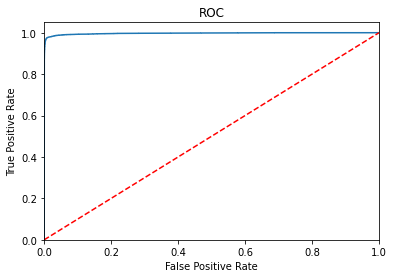

In [169]:
from sklearn.metrics import roc_auc_score, roc_curve


y = y_test
X = x_test


logit_roc_auc = roc_auc_score(y, grid_best_XGB.predict(X))

fpr, tpr, thresholds = roc_curve(y, grid_best_XGB.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


In [158]:
'x_tr[Impf.colname]'

'x_tr[Impf.colname]'

In [159]:
'test[Impf.colname]'

'test[Impf.colname]'

#### Creating Submission file

In [160]:
#Best test Prediction with Best Model trained with full trained data

#fitting the model with full train data
model.fit(x_tr,y_tr)

#predicting the model with full test data
best_pred=model.predict(test)

412/412 [==============================] - 0s 405us/step


In [161]:
#test=test.drop('buy',axis=1)

In [162]:
test['buy']=best_pred
test

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,user_activity,user_activity_labeled,Active_days_no,buy
0,39162,2,2,2.0,1,1,0,0,0,1,0,0,0,0,1,0,4,1,137,0.054355
1,39163,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0,2,1,590,0.054355
2,39164,8,7,2.0,0,0,0,0,1,1,0,0,0,0,0,0,2,1,84,0.054355
3,39165,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0,5,2,558,0.054355
4,39166,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,297,0.054355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,16,12,2.0,0,0,0,0,0,1,1,0,0,0,0,0,2,1,227,0.054355
13180,52342,12,8,2.0,1,0,0,0,0,1,0,0,0,0,0,0,2,1,11,0.054355
13181,52343,14,14,3.0,0,0,1,0,0,0,1,0,0,0,0,0,2,1,227,0.054355
13182,52344,14,10,2.0,0,0,0,0,0,0,1,0,0,0,1,0,2,1,227,0.054355


In [163]:
submission_files=pd.DataFrame()
submission_files['id']=test.loc[:,"id"]
submission_files["buy"]=test.loc[:,"buy"]
submission_files

,id,buy
0,39162,0.054355
1,39163,0.054355
2,39164,0.054355
3,39165,0.054355
4,39166,0.054355
...,...,...
13179,52341,0.054355
13180,52342,0.054355
13181,52343,0.054355
13182,52344,0.054355


In [165]:
submission_files =submission_files.reset_index(drop=True)
submission_files

,id,buy
0,39162,0.054355
1,39163,0.054355
2,39164,0.054355
3,39165,0.054355
4,39166,0.054355
...,...,...
13179,52341,0.054355
13180,52342,0.054355
13181,52343,0.054355
13182,52344,0.054355


In [166]:
df_sample

,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1
...,...,...
13179,52341,1
13180,52342,1
13181,52343,1
13182,52344,1


In [167]:
#converting to csv file format
submission_files.to_csv('Smart_Lead_Scoring_Engine47_AllFeat.csv', index = False)

In [148]:
pd.read_csv('Smart_Lead_Scoring_Engine47_AllFeat.csv')

,id,buy
0,39162,0.095523
1,39163,0.095523
2,39164,0.095523
3,39165,0.095523
4,39166,0.095523
...,...,...
13179,52341,0.095523
13180,52342,0.095523
13181,52343,0.095523
13182,52344,0.095523


# Results

Surprisingly, the best model IS NOT the deep neural network. Instead it's the XGBoostClassifier and Random Forest. I would have initially picked it out to be the second best one out of the lot. This speaks to it's power as a model and also to the fact that training deep neural networks is challenging and a lot of the time it seems that you're better off choosing a simpler model.

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 



In [104]:
def getBestParams(model,x,y):
    
    tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25],
                     'n_estimators':[100,150,200]}]
    grid = GridSearchCV(estimator = model, 
                         param_grid = tuned_paramaters, 
                         cv = 10)
    
    gridModel=grid.fit(x,y)
    
    return gridModel



bestParams=getBestParams(RandomForestClassifier(),x_train_sc,y_train)
            
print(bestParams.best_params_)

In [105]:
'x_tr[Impf.colname]'

'x_tr[Impf.colname]'

In [106]:
'x_resamp[Impf.colname]'

'x_resamp[Impf.colname]'

In [107]:
len(y_resamp)

74326

In [108]:
'x_train,x_test,y_train,y_test=split(x_resamp[Impf.colname],y_resamp,random_state=100,test_size=0.25)'

'x_train,x_test,y_train,y_test=split(x_resamp[Impf.colname],y_resamp,random_state=100,test_size=0.25)'

In [109]:
def BuildModel(x,y):
    accuracy=[]
    f1score=[]
    models=[]
    models.append(LogisticRegression())
    models.append(KNeighborsClassifier())
    models.append(SVC(random_state=40))
    models.append(RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True))
    models.append(GradientBoostingClassifier(random_state=42))
    models.append(XGBClassifier(random_state=42, verbosity=0))
    models.append(DecisionTreeClassifier())
    models.append(GaussianNB())
    
    
    for model in models:
        
        
        
        model.fit(x,y)
        test_pred=model.predict(x_test)
            
            
            
        
        print(f'Model: {model}\n')
        
        print('\n Classification Report : \n ')
        
        print(classification_report(y_test, test_pred))
        
        print('\n')
        
        print(f'Model: {model}\nAccuracy: {accuracy_score(y_test, test_pred)}\nF1-score: {f1_score(y_test, test_pred)}\n\n')


# Model Building        
BuildModel(x_train,y_train)

Model: LogisticRegression()


 Classification Report : 
 
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      9256
         1.0       0.98      0.89      0.93      9326

    accuracy                           0.94     18582
   macro avg       0.94      0.94      0.94     18582
weighted avg       0.94      0.94      0.94     18582



Model: LogisticRegression()
Accuracy: 0.9366053169734151
F1-score: 0.9339241642360332


Model: KNeighborsClassifier()


 Classification Report : 
 
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      9256
         1.0       0.95      0.96      0.95      9326

    accuracy                           0.95     18582
   macro avg       0.95      0.95      0.95     18582
weighted avg       0.95      0.95      0.95     18582



Model: KNeighborsClassifier()
Accuracy: 0.9540953611021419
F1-score: 0.9544702428609554


Model: SVC(random_state=40)


 Classification 